In [1]:
from rgrow.sdc import SDC, SDCStrand, SDCParams
from rgrow.rgrow import SDC1DBindReplace
from rgrow import State, KTAM, EvolveOutcome
import numpy as np

In [2]:
def make_bitcopy_params(N, input="0", conc=1e-7, cdl=10, sdl=20):
    strands = []

    match input:
        case "0":
            conc0 = 1e-7
            conc1 = 0
        case "1":
            conc0 = 0
            conc1 = 1e-7
        case _:
            raise ValueError("Input must be '0' or '1'")

    strands.append(SDCStrand(conc0, "c0", "sc0", "c0*", "input0", color="blue"))
    # strands.append(SDCStrand(conc1, "c1", "sc0", "c1*", "input1", color="red"))

    for i in range(1,N):
        strands.append(SDCStrand(conc, "c0", f"sc{i}", "c0*", f"{i}_0", color="teal"))
        strands.append(SDCStrand(conc, "c1", f"sc{i}", "c1*", f"{i}_1", color="orange"))

    params = SDCParams(
        strands=strands,
        # glue_dg_s = (
        #     {"c0": mean_energies(cdl)} |
        #     {"c1": mean_energies(cdl)} |
        #     {f"sc{i}": mean_energies(sdl) for i in range(0,N) }
        # ),
        scaffold = [f"sc{i}*" for i in range(0,N)]
    )

    return params

In [5]:
def time_to_finish(N):
    sys = SDC1DBindReplace(make_bitcopy_params(N))
    state = State((4096*2, N), "SquareCompact")
    sys.update_state(state)
    outcome = sys.evolve(state, for_time=10000000)
    if outcome == EvolveOutcome.ReachedZeroRate:
        return state.time
    else:
        return np.nan


In [6]:
from tqdm.contrib.concurrent import thread_map

In [ ]:
vals = np.arange(5, 210, 5)
out = thread_map(time_to_finish, vals)

  0%|          | 0/41 [00:00<?, ?it/s]

In [46]:
import matplotlib.pyplot as plt

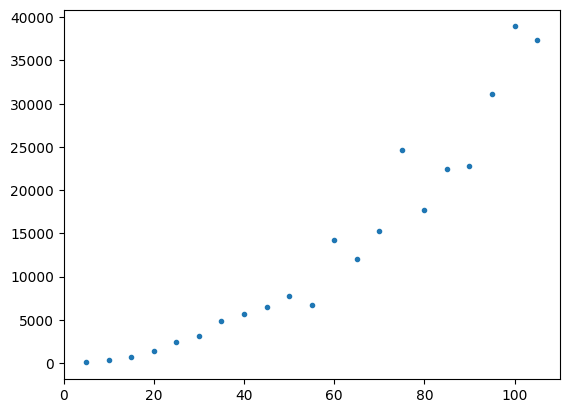

In [47]:
plt.plot(vals, out, '.') 

In [48]:
out

[64.09772134527078,
 304.5915070323615,
 753.1183193599702,
 1350.456851551759,
 2391.2459073746218,
 3129.416845355924,
 4851.791561241512,
 5726.096134267589,
 6505.209166467205,
 7802.088193168031,
 6760.345824710177,
 14241.782010066809,
 11984.738741048528,
 15305.414086562152,
 24615.8661648729,
 17719.546085194146,
 22460.049728217076,
 22844.683712281472,
 31163.063444011168,
 38932.65609738,
 37401.22144138293]

In [11]:
state = State((32, 10), "SquareCompact")

sys.update_state(state)

In [16]:
sys.setup_state(state)

In [17]:
state

State(n_tiles=0, time=0 s, events=0, size=(10, 32), total_rate=608)

EvolveOutcome.ReachedZeroRate

<Axes: >

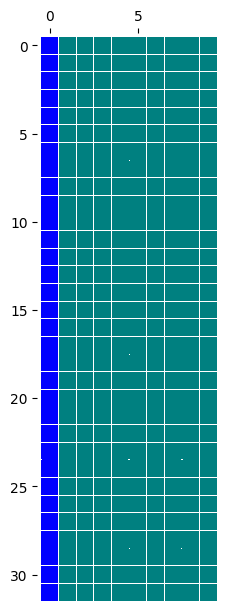